

<h1>MSIN0143 Programming for Business Analytics</h1>


<h1>Analysis on Millennials in the Workforce</h1>


<h2>Group Project of Team A</h2>
<h3>Yafei Guo</h3>
<h3>Katharina Wiedmann</h3>
<h3>Wenhao Jiao</h3>
<h3>Symeon Kokovidis</h3>
\*\*\*\*
<br /> <br /> 

<h2> Outline</h2><br />

<h2> 1. Introduction</h2>

<h2> 2. Data Exploration</h2>

<h2>3. Data Cleaning - Data Manipulation</h2>

<h2> 4. Descriptive analysis</h2>

<h2> 5. Feature Engineering</h2>

<h2> 6. Predictive analysis</h2>  

<h2> 7. Conclusion and business actions</h2> 

<h2> 8. Appendix</h2> 


<br /> <br /> <br /> <br /> 

\*\*\*\*
<h1> 1. Introduction </h1>
<h2>1.1 Business Context </h2>

Employee attrition can be costly for a company. For instance, a company needs to spend time and resources on recruiting and training new talent. Skill gaps between new employees and experienced employees may reduce productivity, thus affecting overall profits. A high turnover rate is also especially concerning in customer facing roles as customers often prefer to interact with the same people, rather than with new individuals each time (Incentius.com, 2019). 

The increasing number of Millennials in today’s workplace may increase the overall attrition rate as they are harder to retain than previous generations (Bannon et al., 2011). According to KPMG (2017), Millennials prefer flexibility and are more entrepreneurial than Gen X, indicating that they are more difficult to retain. Apart from the age gap, there are also many other factors that may affect employee attrition rate such as gender, education and so on. Hence, many researches have been conducted to find factors that can affect employee attrition rate in an organization.

This project, therefore, aims to help businesses to mitigate their employee attrition rate based on both descriptive and predictive analysis of an employee attrition dataset. To better meet the trends in the future workplace, this project will put emphasis on Millennials.

<h2>1.2 Getting Data</h2>
<h3> Where and Why did we get this dataset</h3>

We get the data from the kaggle: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset.  

The dataset contains data for employees aged 18 - 60 years old and is comprised of over 30 attributes (e.g. employees income, age,job role, the distance they have to travel to work, etc.) which we will explore in detail below.

Our analysis is based on the assumption that employees leave the company during one year and no one joins the company during that same year.

<h3> Import libraries </h3>


In [1]:
conda install -c conda-forge xgboost #Install xgboost package in our environment

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda/envs/Python3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    libxgboost-0.90            |       he1b5a44_4         2.4 MB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    py-xgboost-0.90            |           py36_4          73 KB  conda-forge
    xgboost-0.90               |   py36he1b5a44_4          11 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.9 MB

The following NEW packages will be INST

In [2]:
# Python libraries
import pandas as pd #Data Analysis for tabular data
import numpy as np # Scientific computing and data manipulation 
import scipy.stats as stats # Statistical package

import matplotlib.pyplot as plt # Visualizations
from matplotlib import rcParams  #Customizing Matplotlib with style sheets and rcParams
import seaborn as sns #Advances Visualizations based on matplotlib.pyplot

import xgboost as xgb #Gradient Boosting Framework for Machine Learning

import warnings #Warning control

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
 

#Setting general properties in this document
pd.set_option('display.max_columns', 50) #show all the columns when we call our dataset
warnings.filterwarnings('ignore') #do not display warning messages

<h3>Import dataset</h3>

First we import our dataset:

In [3]:
raw_data = pd.read_csv('/project/HR-Employee-Attrition.csv') # pandas's read_csv() function to read .csv files

Now we are going to get the size of our imported dataset.

In [4]:
raw_data.shape

(1470, 35)

We can see that it has 1470 observations (no. of employees) and 35 attributes. 
We extract these 35 attributes below. 

In [5]:
raw_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

As we have many attributes, we believe that examining each one will not be time-efficient. For this reason we create lists that keep the name of the columns with the same data type (numerical, categorical). These lists will be used further in our report.

In [6]:
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 
 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 
 'NumCompaniesWorked','PercentSalaryHike',  'StandardHours',
 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 
 'YearsInCurrentRole', 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'Education',
'EducationField', 'EnvironmentSatisfaction',
'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
'JobSatisfaction', 'MaritalStatus','Over18',
'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
'StockOptionLevel','WorkLifeBalance' ]

<h1> 2. Exploring the dataset </h1>
<h2> 2.1 Get general metrics for each attribute / Identify outliers </h2>

In [7]:
df=raw_data.copy() #We make a copy so we can always refer to it without risking to change our original dataset by mistake. 

Below we see if we have any missing values:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

As the number of non-null values is the same for every column, we conclude that we do not have any missing values.

Next, we want to check our data for any outliers. We do this by looking at the data points in the numerical columns (as defined in Import dataset section). We could do this as well by generating boxplots for each variable but this seems to be rather inconvenient due to the number of numerical variables. Therefore we decided to go for the approach using a mathematical function. If the z-score value is greater than or less than 3 or -3 respectively, this data point will be identified as outliers (Medium, 2019). 

In [9]:
zscores = pd.DataFrame(stats.zscore(df.loc[:, numerical_columns])>3) #returns True if there is an outlier in the subsequent cell. 
zscores.columns = df.loc[:, numerical_columns].columns #getting the columns' names
#zscores

In [10]:
zscores.eq(True).any() #As we do not want to go through all cells manually and look for any True values, we use the next function to detect if there are any True values. 

Age                        False
DailyRate                  False
DistanceFromHome           False
EmployeeCount              False
HourlyRate                 False
MonthlyIncome              False
MonthlyRate                False
NumCompaniesWorked         False
PercentSalaryHike          False
StandardHours              False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany              True
YearsInCurrentRole          True
YearsSinceLastPromotion     True
YearsWithCurrManager        True
dtype: bool

Indeed we can see that there are 5 columns which contain True values, i.e. they indicate that there are outliers in these columns. We look at the histograms and the minimum and the maximum values of these variables to make sense of whether the indicated outliers are actual or just statistical outliers.

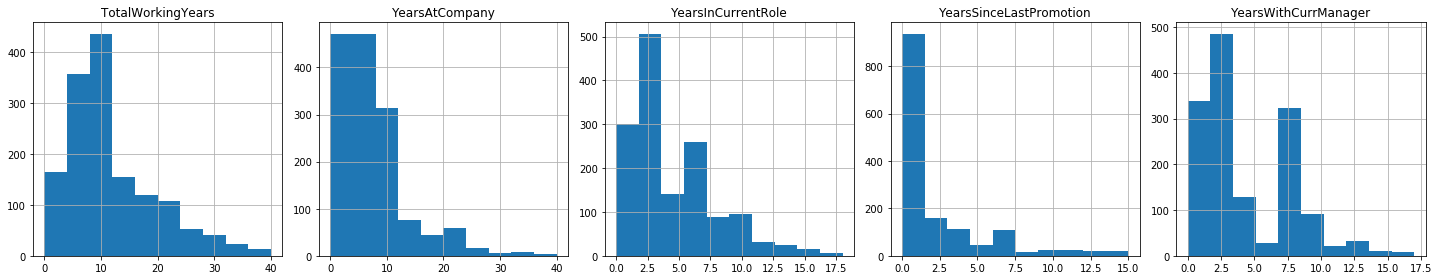

In [11]:
plt.rcParams['figure.figsize'] = [20, 4]
fig, axes = plt.subplots(nrows=1, ncols=5)

df.loc[:, numerical_columns].loc[:,'TotalWorkingYears'].hist(ax=axes[0]).title.set_text('TotalWorkingYears')
df.loc[:, numerical_columns].loc[:,'YearsAtCompany'].hist(ax=axes[1]).title.set_text('YearsAtCompany')
df.loc[:, numerical_columns].loc[:,'YearsInCurrentRole'].hist(ax=axes[2]).title.set_text('YearsInCurrentRole')
df.loc[:, numerical_columns].loc[:,'YearsSinceLastPromotion'].hist(ax=axes[3]).title.set_text('YearsSinceLastPromotion')
df.loc[:, numerical_columns].loc[:,'YearsWithCurrManager'].hist(ax=axes[4]).title.set_text('YearsWithCurrManager')

plt.tight_layout() 

In [12]:
df.loc[:, ['TotalWorkingYears','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].describe().loc[['min','max']]

,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
min,0.0,0.0,0.0,0.0,0.0
max,40.0,40.0,18.0,15.0,17.0


The minimum and maximum values are reasonable for all five columns. Therefore, we can see that we do not have any outliers.

<h2> 2.2 Distribution check</h2>


Before we enter deeper into our analysis, we need to find out the distribution of some numerical attributes (especially attributes regarding income as they are often believed to be skewed across population).

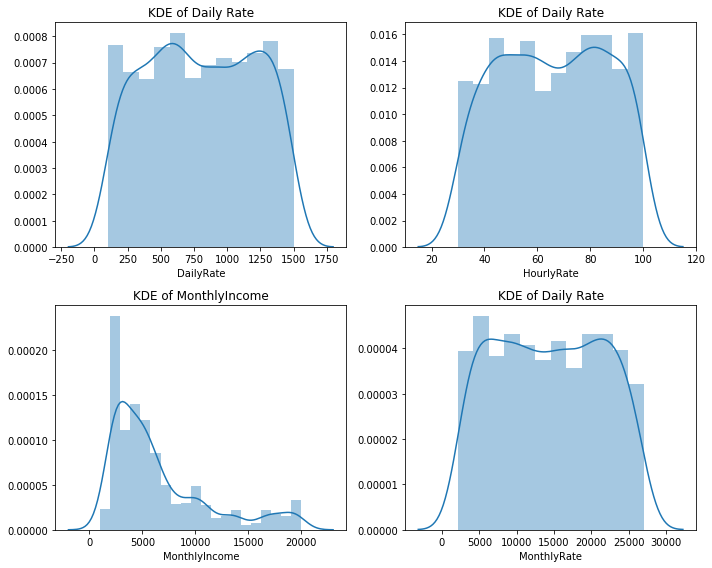

In [13]:
f, axes = plt.subplots(2, 2, figsize=(10,8)) 
sns.distplot(df['DailyRate'], ax=axes[0,0]).set_title('KDE of Daily Rate')  #seaborn package is used to create a histogram combined with Kernel Density Estimation (KDE)
sns.distplot(df['HourlyRate'], ax=axes[0,1]).set_title('KDE of Daily Rate') #Neither pandas nor matplotlib can create these two graphs combined in a single visualization.
sns.distplot(df['MonthlyIncome'], ax=axes[1,0]).set_title('KDE of MonthlyIncome')
sns.distplot(df['MonthlyRate'], ax=axes[1,1]).set_title('KDE of Daily Rate')
plt.tight_layout();

From the above plots we realize that the MonthlyIncome is positively skewed. This can be confirmed also by calculating its skewness score:

In [14]:
df['MonthlyIncome'].skew()
#We will take log transformations if some distributions are skewed to decrease the skewness of these variables, which will be beneficial for further analysis. 

1.3698166808390662

In skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially in regression-based models. A log transformation can help to fit a very skewed distribution into a Gaussian one. Therefore, the log transformation could be applied to "MonthlyIncome", however, as we are not going to use any linear regression model in this analysis, we omit this transformation.

<h1> 3. Data Cleaning - Data Manipulation </h1>

For aiding our analysis, we performed major cleaning steps and manipulations.

The "EmployeeNumber" is the id of the employee. As every employee has a different employee number we replace the index with the "EmployeeNumber" as this will be more meaningful.

In [15]:
df = df.set_index('EmployeeNumber')

We change the following variables to categorical ones:

In [16]:
print(categorical_columns) #increase

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


Changing the attribute type can potentially increase the execution time and simplifies further our analysis.

In [17]:
#It may not reduce the Python runtime significantly in terms of this dataset, 
#however, variable type transformation will significantly reduce runtime if 
#other datasets are merged with the current dataset and if complex computations
#are required in future analysis.

for col in categorical_columns:
    df[col] = df[col].astype('category')

To check if we have correctly assigned the categorical columns we used the .info( ) method:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EnvironmentSatisfaction   1470 non-null   category
 10  Gender                    1470 non-null   category
 11  HourlyRate                1470 non-null   int64   
 12  JobInvolvement            1470 non-null   category
 13  JobLevel                  1470 non-null   catego

Since there are some variables whose values are identical across the employees:  
- Over18: As all employees are over 18 years old, it will always return "Y" 
- EmployeeCount: Each employee is counted once, hence it will always return 1  
- StandardHours: Since the standard hours (bi-weekly) are 80 for all employees, it will always return 80 


We need to drop these columns as they are redundant.

In [19]:
df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [20]:
df.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [21]:
df.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [22]:
df.drop(columns=['Over18', 'EmployeeCount', 'StandardHours'], inplace=True)

<h1> 4. Descriptive Analysis</h1>
<h2> 4.1 Define Age Groups</h2> 

As our analysis will focus on the Millennials who work in the company, we firstly explore the age attribute:

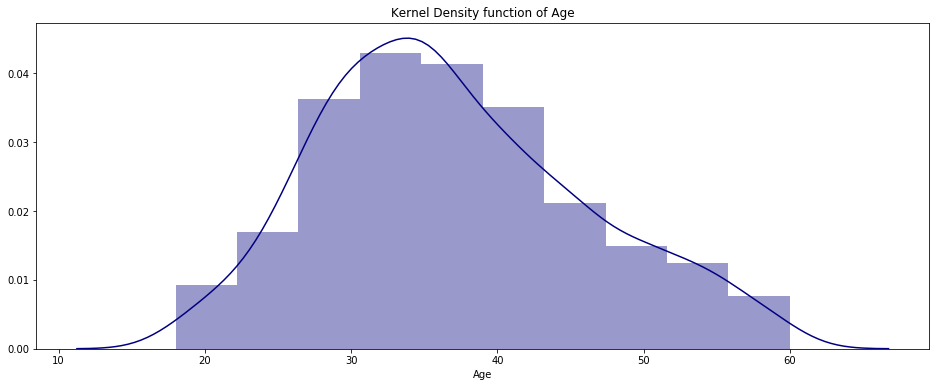

In [23]:
plt.figure(figsize=(16, 6))
sns.distplot(df['Age'], bins=10, color="navy").set_title('Kernel Density function of Age');

From the Kernel Density Function, we see that most employees in the company are between 30 and 40 years old.
Now we are going to check the attrition rate at different ages.

In [24]:
target_map = {'Yes':1, 'No':0} #we assign '1' to employees who leave the company and '0' to employees who stay in the company. 
df["Attrition_numerical"] = df["Attrition"].apply(lambda x: target_map[x]) # we use the pandas apply method to numerically encode our attrition target variable 
df = df.drop('Attrition', axis=1)

For each age we want to have a glance at the total number of employees who have left the company but also their subsequent proportion. 

In [25]:
att_age = pd.crosstab(df.Age, df.Attrition_numerical).apply(lambda r: r/r.sum(), axis=1) #calcualate the percentage
att_age.columns = ['No Attrition Percentage', 'Attrition Percentage']

att_age_count = df.groupby(['Age', "Attrition_numerical"])['Age'].count().transpose() #count number of employees who left the company or not and then transpose the table
att_age_count = att_age_count.unstack()
att_age_count.columns = ['No Attrition-Number of Employees', 'Attrition-Number of Employees']

att_age = att_age.reset_index().merge(att_age_count, on='Age', how='left').set_index('Age') #we merge these two tables
att_age.iloc[list(range(2,45,5))] #a snapshot of the table

,No Attrition Percentage,Attrition Percentage,No Attrition-Number of Employees,Attrition-Number of Employees
Age,,,,
20,0.454545,0.545455,5,6
25,0.769231,0.230769,20,6
30,0.850000,0.150000,51,9
35,0.871795,0.128205,68,10
40,0.912281,0.087719,52,5
45,0.951220,0.048780,39,2
50,0.833333,0.166667,25,5
55,0.863636,0.136364,19,3
60,1.000000,0.000000,5,0


We create four bins which correspond to the quantiles of the age observations. The first quantile actually will correspond to the Millennials.

In [26]:
df.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [27]:
df['Age-quantiles'] = pd.qcut(df['Age'], q=[0, .25, .50, .75, 1], labels=['18-30', '31-36', '37-43', '44-60'])

Now we replicate the previous table considering the age groups we have defined.

In [28]:
att_age_bins = pd.crosstab(df['Age-quantiles'], df.Attrition_numerical).apply(lambda r: r/r.sum(), axis=1) #calcualate the percentage
att_age_bins.columns = ['No Attrition Percentage', 'Attrition Percentage']

att_age_count_bins = df.groupby(['Age-quantiles', "Attrition_numerical"])['Age-quantiles'].count().transpose().unstack() #count number of employees who left the company or not and then transpose the table
att_age_count_bins.columns = ['No Attrition-Number of Employees', 'Attrition-Number of Employees']

att_age_bins = att_age_bins.reset_index().merge(att_age_count_bins, on='Age-quantiles', how='left').set_index('Age-quantiles') #we merge these two tables
att_age_bins #a snapshot of the table

,No Attrition Percentage,Attrition Percentage,No Attrition-Number of Employees,Attrition-Number of Employees
Age-quantiles,,,,
18-30,0.740933,0.259067,286,100
31-36,0.839806,0.160194,346,66
37-43,0.910769,0.089231,296,29
44-60,0.878963,0.121037,305,42


Below, we visualize the percentage and absolute value of attrition for each age group.

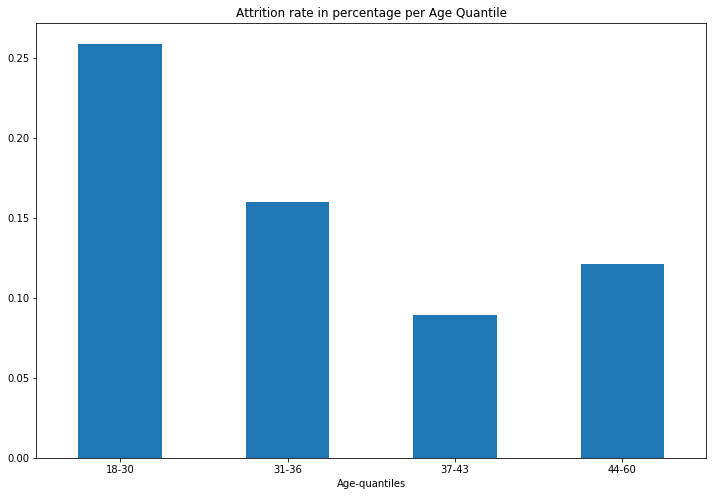

In [29]:
plt.figure(figsize=(12, 8))
att_age_bins['Attrition Percentage'].plot.bar(rot=0, title='Attrition rate in percentage per Age Quantile'); #attrition percentage across different quantiles 

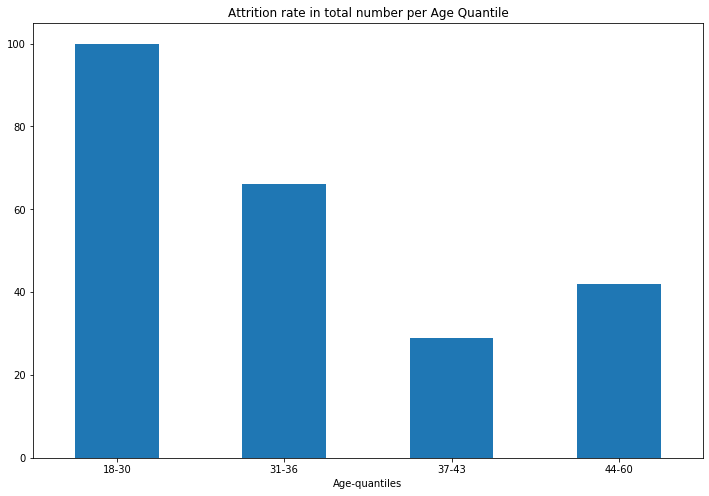

In [30]:
plt.figure(figsize=(12, 8))
att_age_count_bins['Attrition-Number of Employees'].plot.bar(rot=0, title='Attrition rate in total number per Age Quantile');

In [31]:
df['Millennials'] = 0 #We define employees who are aged between 18 and 30 to be Millennials and assign them value of 1.
df.loc[df['Age-quantiles']=='18-30', 'Millennials'] = 1

<h2>  4.2 Education of Millennials </h2> 

We now look at whether we can find a difference in the attrition rate depending on the education level. This is best to be seen when all education levels are streteched to 100% and then the attrition rates are compared. 

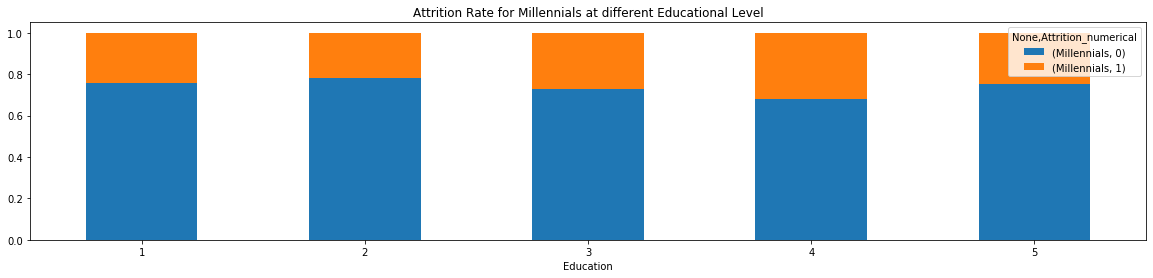

In [32]:
df_educ = df.set_index(['Education', 'Attrition_numerical'])

tps = df_educ.pivot_table( values=['Millennials'],
                      index='Education',
                      columns='Attrition_numerical',
                      aggfunc='sum')

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True,  rot=0, title='Attrition Rate for Millennials at different Educational Level');

In Education level 4, the attrition rate seems to be relatively higher compared to the other groups, however we could not detect an education group where the attrition rate is way larger than in any other group. Also we want to investigate the field of education from Millennials as shown in the graph below.

<h2>  4.2 The Gender Pay Gap of Millennials </h2> 

We use a violin plot to describe the relationship between Monthly Income and Gender among Millennials.

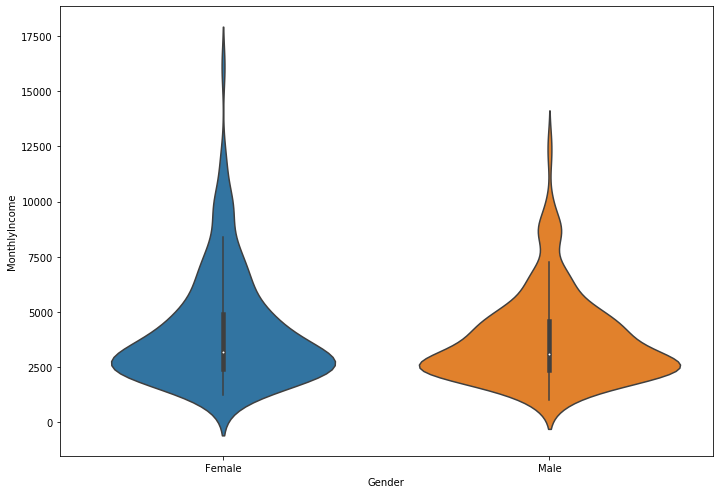

In [34]:
# A violin plot is a method of plotting numeric data which includes a marker for the median of the data;
# a box or marker indicating the interquartile range and the distribution of the data.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="Gender", y="MonthlyIncome",data=df.loc[df['Millennials']==1]);

From this plot chart, the distribution of both female and male in the Millennials group are almost the same. They have similar mean values and the same most common monthly income (2500). However, the interquartile range of female is wider than the male's one (from 25% to 75%). Compared to females, the distribution of male concentrates in the bottom, which means male have lower monthly incomes in general. Moreover, the highest income value of female is higher than male.

Therefore, the monthly income situation of females and males are similar in general while there are some females with very high monthly incomes (we can regard them as outliers). 

Drawing a line gragh of Millennials' monthly income at different ages, we can see that there is a continuous increasing trend with small fluctuations.

In [35]:
#ax = sns.lineplot(x="Age", y="MonthlyIncome", data=df.loc[df['Millennials']==1])

We then created a heat map that includes training days and job role.

In [36]:
# heat = pd.pivot_table(df.reset_index(), values='TrainingTimesLastYear', aggfunc=np.mean,index="JobRole", columns='Age-quantiles')
# cmap = sns.diverging_palette(15, 150, s=99, l=50, n=10, as_cmap=True)
# fig, ax = plt.subplots(figsize=(16,10)) 
# ax = sns.heatmap(heat, cmap=cmap, annot=True)
# bottom, top = ax.get_ylim() #fix bug "matplotlib/seaborn: first and last row cut in half of heatmap plot" ref: https://stackoverflow.com/a/58165593
# ax.set_ylim(bottom + 0.5, top - 0.5)
# ax.set_title('Average Trainings of Last Year per Department & Age Group')
# ax.set(xlabel='Age Groups', ylabel='Departments');
# ax = ax.collections[0].colorbar
# ax.set_ticks([2.0, 2.3, 2.6, 2.9, 3.1 , 3.4, 3.7])
# #pd.pivot_table(df, values = 'Value', index=['Country','Year'], columns = 'Indicator').reset_index()


Then we created a heatmap which combines job roles, age groups and attrition rate. We found out that Millennials who are sales representatives have an exceptionally high attrition rate, followed by Millennials who are members of the Human Resources. For non-millennial age groups, there is no significant difference in attrition rate across different job roles.

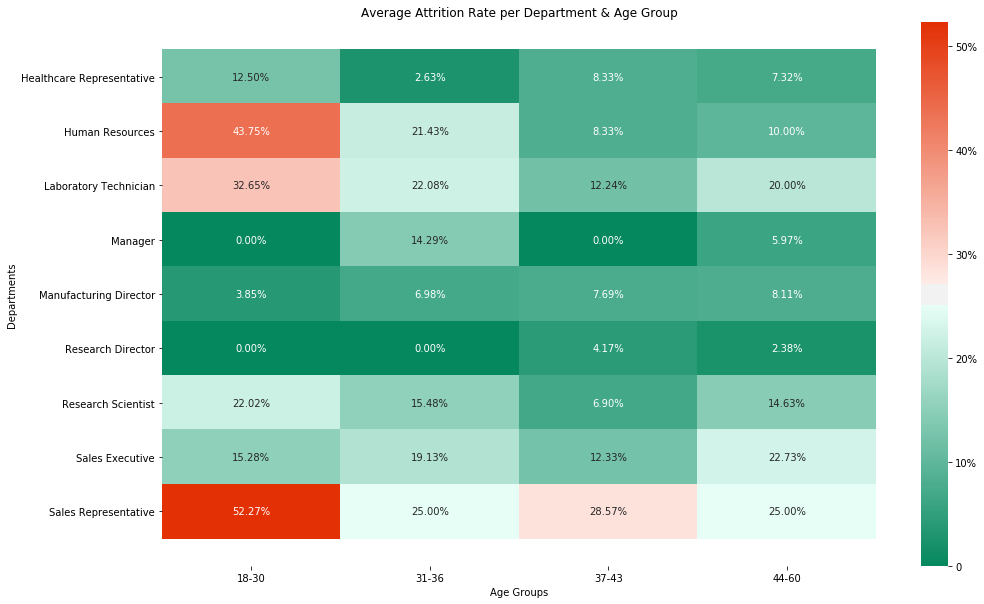

In [37]:
df['Attrition_numerical'] = df['Attrition_numerical'].astype(int)
heat = pd.pivot_table(df.reset_index(), values='Attrition_numerical', aggfunc=np.mean,index="JobRole", columns='Age-quantiles')
cmap = sns.diverging_palette(150, 15, s=99, l=50, n=10, as_cmap=True)
fig, ax = plt.subplots(figsize=(16,10))  
ax = sns.heatmap(heat, cmap=cmap, annot=True, fmt=".2%")
bottom, top = ax.get_ylim() #fix bug "matplotlib/seaborn: first and last row cut in half of heatmap plot" ref: https://stackoverflow.com/a/58165593
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Average Attrition Rate per Department & Age Group')
ax.set(xlabel='Age Groups', ylabel='Departments')
ax = ax.collections[0].colorbar
ax.set_ticks([0, .1, .2, .3, .4, .5])
ax.set_ticklabels(['0', '10%', '20%', '30%', '40%', '50%']);

df['Attrition_numerical'] = df['Attrition_numerical'].astype('category')

By comparing the two heatmaps, we found out that Millennials who take HR roles receive less training, and they have a relatively high attrition rate.

<h1>  5. Featuring Engineering </h1> 
In this section we are going to create four new features based on our existing ones.

In [38]:
#We create a ratio which keeps the Job Satisfaction Level divided by the Distance From Home for every employee
df['Commute_JobSatisfaction_Ratio'] = df['JobSatisfaction'].astype(int) / df['DistanceFromHome'].astype(int)

#We create a Job Fullfillment attribute which get the average from Job Satisfaction and Job Involvement
df['JobFulfillment'] = (df['JobSatisfaction'].astype(int) + df['JobInvolvement'].astype(int)) / 2

#We create a Loyalty Index attribute which is a ratio of Number of Companies Worked divided by the Total Working Years
df['Loyalty_index'] = df['NumCompaniesWorked'].astype(int) / df['TotalWorkingYears'].astype(int)

#We create a Happiness Index which summarizes factors that could affect employee's satisfaction
df['Happiness_index'] = (df['RelationshipSatisfaction'].astype(int)  + df['EnvironmentSatisfaction'].astype(int) + df['JobSatisfaction'].astype(int) 
                                  + df['JobInvolvement'].astype(int) + df['WorkLifeBalance'].astype(int) + df['Commute_JobSatisfaction_Ratio'])/6

Now we draw two graphs - for the distribution of both Happiness Index and Loyalty Index.

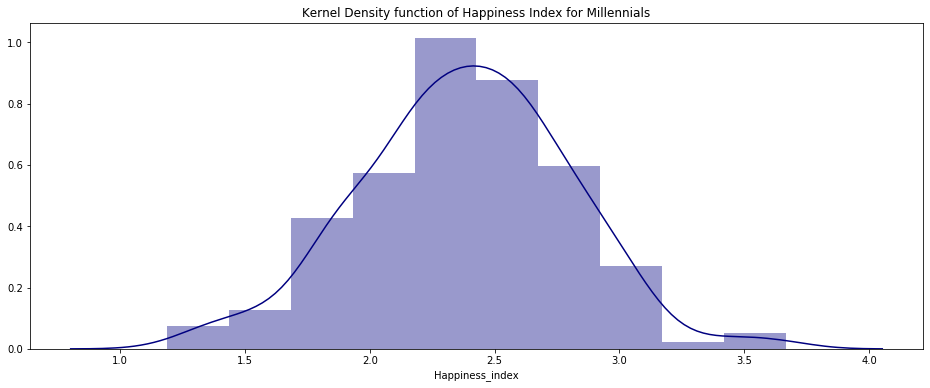

In [39]:
plt.figure(figsize=(16, 6))
sns.distplot(df.loc[df['Millennials']==1 , 'Happiness_index'], bins=10, color="navy").set_title('Kernel Density function of Happiness Index for Millennials');

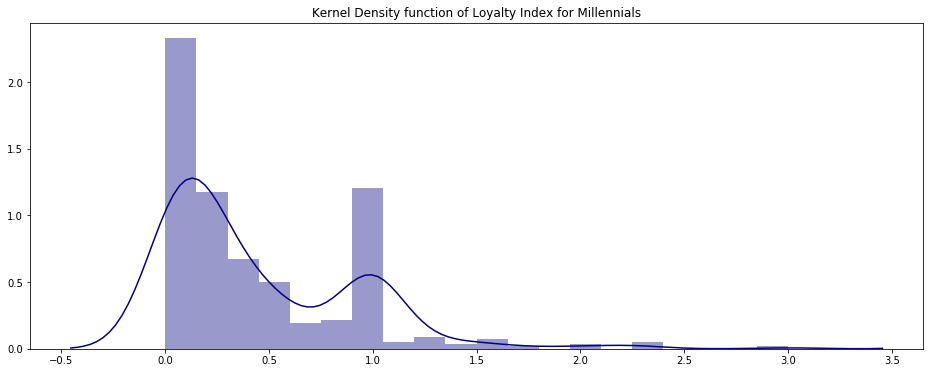

In [40]:
plt.figure(figsize=(16, 6))

loyalty_index = df[np.isfinite(df['Loyalty_index']) ]
loyalty_index = loyalty_index.loc[loyalty_index['Millennials']==1, ['Loyalty_index']]
loyalty_index 

sns.distplot(loyalty_index, bins=20, color="navy").set_title('Kernel Density function of Loyalty Index for Millennials');

<h1>  6. Predictive Analysis </h1> 
Now we demonstrate how we can predict Millennial employee's turnover

In [41]:
dfp = df.copy() #copy of the original DF because we are going to preprocess the features for the prediction

First we preprocess the data.

In [42]:
specs_to_dummies = list(dfp.select_dtypes(['object','category']).columns) #categorical variables into dummies
specs_to_dummies.remove('Attrition_numerical') #we exclude the response from converting
    
for item in specs_to_dummies:
    dummies = pd.get_dummies(df[item], prefix_sep=': ', prefix=item)
    dfp = pd.concat([dfp, dummies], sort=False, axis=1)

dfp = dfp.drop(specs_to_dummies, axis=1).copy()
dfp = dfp.loc[dfp.Millennials==1]
dfp.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical,Millennials,Commute_JobSatisfaction_Ratio,JobFulfillment,Loyalty_index,Happiness_index,BusinessTravel: Non-Travel,BusinessTravel: Travel_Frequently,BusinessTravel: Travel_Rarely,Department: Human Resources,Department: Research & Development,...,JobSatisfaction: 3,JobSatisfaction: 4,MaritalStatus: Divorced,MaritalStatus: Married,MaritalStatus: Single,OverTime: No,OverTime: Yes,PerformanceRating: 3,PerformanceRating: 4,RelationshipSatisfaction: 1,RelationshipSatisfaction: 2,RelationshipSatisfaction: 3,RelationshipSatisfaction: 4,StockOptionLevel: 0,StockOptionLevel: 1,StockOptionLevel: 2,StockOptionLevel: 3,WorkLifeBalance: 1,WorkLifeBalance: 2,WorkLifeBalance: 3,WorkLifeBalance: 4,Age-quantiles: 18-30,Age-quantiles: 31-36,Age-quantiles: 37-43,Age-quantiles: 44-60
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,27,591,2,40,3468,16632,9,12,6,3,2,2,2,2,0,1,1.000000,2.5,1.500000,2.333333,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
11,30,1358,24,67,2693,13335,1,22,1,2,1,0,0,0,0,1,0.125000,3.0,1.000000,2.520833,0,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
15,29,153,15,49,4193,12682,0,12,10,3,9,5,0,8,0,1,0.200000,2.5,0.000000,2.700000,0,0,1,0,1,...,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
19,28,103,24,50,2028,12947,5,14,6,4,4,2,0,3,1,1,0.125000,2.5,0.833333,2.187500,0,0,1,0,1,...,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
20,29,1389,21,51,9980,10195,1,11,10,1,10,9,8,8,0,1,0.047619,2.5,0.100000,2.174603,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0


Then we split the data into training and testing subsets and we create a predictive model. 

In [46]:
X_train

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Millennials,Commute_JobSatisfaction_Ratio,JobFulfillment,Loyalty_index,Happiness_index,BusinessTravel: Non-Travel,BusinessTravel: Travel_Frequently,BusinessTravel: Travel_Rarely,Department: Human Resources,Department: Research & Development,Department: Sales,...,JobSatisfaction: 3,JobSatisfaction: 4,MaritalStatus: Divorced,MaritalStatus: Married,MaritalStatus: Single,OverTime: No,OverTime: Yes,PerformanceRating: 3,PerformanceRating: 4,RelationshipSatisfaction: 1,RelationshipSatisfaction: 2,RelationshipSatisfaction: 3,RelationshipSatisfaction: 4,StockOptionLevel: 0,StockOptionLevel: 1,StockOptionLevel: 2,StockOptionLevel: 3,WorkLifeBalance: 1,WorkLifeBalance: 2,WorkLifeBalance: 3,WorkLifeBalance: 4,Age-quantiles: 18-30,Age-quantiles: 31-36,Age-quantiles: 37-43,Age-quantiles: 44-60
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
142,25,240,5,46,5744,26959,1,11,6,1,6,4,0,3,1,0.600000,2.5,0.166667,2.600000,0,0,1,0,0,1,...,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
1143,29,490,10,61,3291,17940,0,14,8,2,7,5,1,1,1,0.200000,2.5,0.000000,2.533333,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
1763,30,305,16,58,5294,9128,3,16,10,3,7,0,1,7,1,0.187500,3.5,0.300000,2.697917,0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
710,29,806,1,76,2720,18959,1,18,10,5,10,7,2,8,1,4.000000,2.5,0.100000,3.000000,0,1,0,0,1,0,...,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
1224,30,853,7,49,3491,11309,1,13,10,4,10,7,8,9,1,0.428571,3.0,0.100000,2.071429,0,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,26,1449,16,45,2373,14180,2,13,5,2,3,2,0,2,1,0.125000,2.5,0.400000,2.187500,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
548,30,317,2,43,6091,24793,2,20,11,2,5,4,0,2,1,2.000000,2.5,0.181818,2.666667,0,0,1,0,1,0,...,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0
1407,26,683,2,36,3904,4050,0,12,5,2,4,3,1,1,1,2.000000,3.0,0.000000,2.666667,0,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0


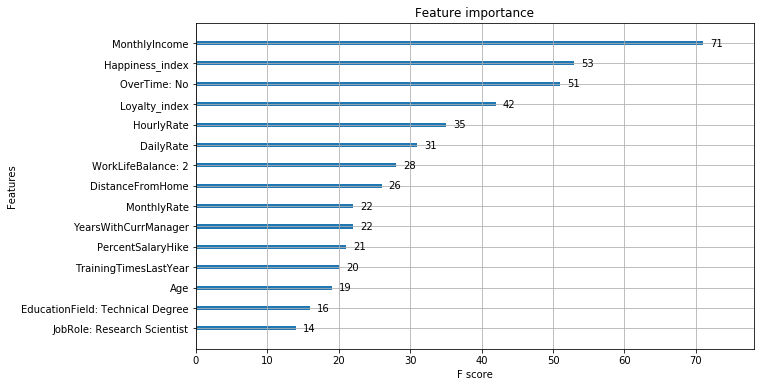

In [43]:

X_train, X_test, y_train, y_test = train_test_split(dfp.drop("Attrition_numerical", axis=1), dfp["Attrition_numerical"], test_size=0.30, random_state=42)

#Unbalanced dataset 286 remained in the company and 100 left the company.
#We need to adjust this in our training algorithm. ref: https://xgboost.readthedocs.io/en/latest/parameter.html

scale_pos_weight = dfp.loc[(dfp['Attrition_numerical']==0) & dfp['Millennials']==1].shape[0] / dfp.loc[(dfp['Attrition_numerical']==0) & dfp['Millennials']==1].shape[0]

model = xgb.XGBClassifier(objective="reg:logistic", scale_pos_weight=scale_pos_weight, scoring='recall') 
#we use scoring='recall' as we believe is the most important metric for our business problem

model.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10,6))
xgb.plot_importance(model, max_num_features = 15, ax=ax);

In the produced plot we get a ranking of the features that have been to be the most important for predicting attrition.

We use the Recall metric which focuses on predicting well the employees who will leave the company (although it might predict erroneously that some people will leave the company while indeed they will not). Below we demonstrate how a different threshold, how easily we predict that someone will leave the company, actually affects the Recall:

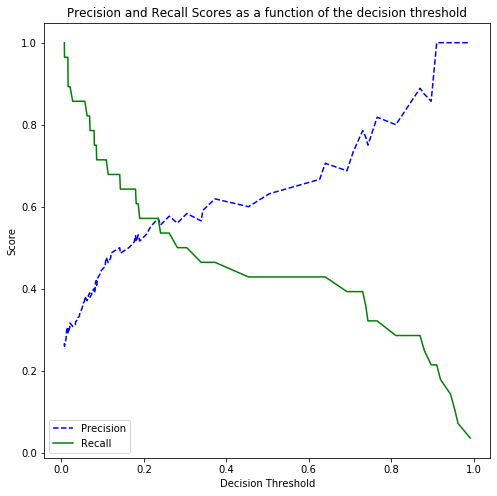

In [44]:
y_pred_prob = model.predict_proba(X_test)[:,1]

p, r, thresholds = precision_recall_curve(y_test,y_pred_prob)

#https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    
plot_precision_recall_vs_threshold(p, r, thresholds) #the plot demonstrates for different theshold how precision and recall varies
#threshold actually is the cut-off point for classifying an employee if they will churn or not.

In [ ]:
#for our final prediction model, we adjust the threshold to 0.22 to increase the recall which is our major objective
#This means that if an employee has a probability to leave company above 0.22, then it will be classified as attrition 
y_pred_class = (model.predict_proba(X_test)[:,1] >= 0.22).astype(bool)

print(classification_report(y_test,y_pred_class))

The confusion matrix below displays the accuracy of the prediction (i.e. How many employees we predicted to leave (in total 12+16=28) and how many left indeed(16) as well as how many we predicted to remain in the company (76+12=88) and how many remained indeed(76).

In [ ]:
cm = confusion_matrix(y_test, y_pred_class)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Attrition', 'Attrition']); ax.yaxis.set_ticklabels(['No Attrition', 'Attrition'])
bottom, top = ax.get_ylim() #fix bug "matplotlib/seaborn: first and last row cut in half of heatmap plot" ref: https://stackoverflow.com/a/58165593
ax.set_ylim(bottom + 0.5, top - 0.5);

<h1>  7. Conclusion and business actions </h1> 
As our analysis is based on Millennials exclusively, we would like to give out recommendations on how to potentially lower the attrition rates for the subsequent age group. We firstly would like to draw attention to the fact that there are different attrition rates across different departments. We therefore suggest the company to take a closer look into the HR department and the Sales Representatives as they show the highest attrition rates (52% and 43%). As in general we assume that attrition rates could be lowered with higher number of training days we also investigated this variable for each age group and department. We cannot draw a causal inference from our model, however based on our results we suggest increasing the number of training days for Millennials in the HR department.  

With our model we identified the most important features with the highest predictive abilitz on attrition rate, and we found that MonthlyIncome, Happiness_index, Overtime:no and Loyalty_index had the highest impact on an employees’ churn. We therefore suggest increasing the income for Millennials as well as making sure they are satisfied with their workplace and they do not work too much. We have also found out that employees who historically have had a lower loyalty to their workplace are more likely to churn in the future as well – this should be taken into account when selecting candidates for a newly opened position.  

 

- Limitations  

As we were particularly interested in the attrition of workforce aged 18-30 years old, we had to base our model on this group to obtain interesting insights. Unfortunately, the dataset is mainly comprised of people outside of this age range therefore we had to work with a rather small number of observations for our predictive model. It is also worth mentioning that we are working with a fictional dataset. The group of the Millennials is therefore based on the assumption that this dataset is from this year (2019).  

 
- Suggestions for improvements  

Firstly, we could focus more on feature engineering and conduct more analysis regarding Millennial's’ attrition rate. For example, we could find more interactions among different attributes. Secondly, we could compare different predictive algorithms for hyperparameter tuning. 

<h1> 8. Appendix </h1>
<h2> JIRA  </h2>

Although this is the first time that we use JIRA as our project management tool, we get used to this software quickly and we use it as the primary tool when we have a meeting. We firstly assign tickets to different group members so that every group member is fully aware of his or her duty. The Pie Chart Report of Assignee provides an intuitive overview of the task allocation. Then we use JIRA to monitor the progress of each group member. More importantly, we can have an overview of the progress of the whole project from the Cumulative Flow Diagram. Overall, JIRA makes a great contribution to the completion of our project. 

<h2> References </h2>

Bannon, S., Ford, K. and Meltzer, L. (2011). Understanding Millennials in the Workplace. The CPA Journal, [online] 81(11), pp.61-65. Available at: https://search.proquest.com/docview/922065831/abstract/20271DCF78D54B2EPQ/1?accountid=14511. 

Incentius.com. (2019). Incentius - Innovative cloud-enabled business intelligent platforms and solutions developed using secure and scalable technologies for your enterprise.. [online] Available at: https://incentius.com/blog-posts/analyzing-attrition-performance/ [Accessed 5 Nov. 2019]. 

KPMG (2017). Meet the Millennials. [online] KPMG, pp.7-20. Available at: https://home.kpmg/content/dam/kpmg/uk/pdf/2017/04/Meet-the-Millennials-Secured.pdf. 

Medium. (2019). Ways to Detect and Remove the Outliers. [online] Available at: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba [Accessed 11 Dec. 2019].